In [157]:
import cv2
import numpy as np
import pandas as pd
from matplotlib  import pyplot as plt
import webp
from PIL import Image,ImageDraw,ImageFont

In [158]:
# all global data
c = 10
fnt = ImageFont.truetype('./data/times new roman.ttf',c)
chl = ['-','@']


In [159]:
def preRender(chs,c):
    trans = {}
    for ch in chs:
        out = Image.new('L',(c,c),color = (0))
        d = ImageDraw.Draw(out)
        d.text((0,0),ch,font = fnt, fill = (255))
        o = np.asarray(out)
        trans[ch] = o
    return trans

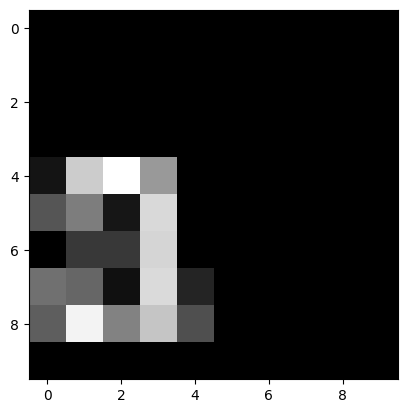

In [160]:
newch = 'a'
chl.append(newch)
trans = preRender(chl,c)
# print(trans[newch])
plt.imshow(trans[newch],cmap = 'gray')

<class 'tuple'>


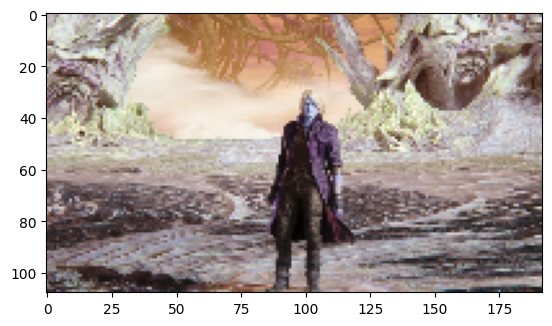

In [161]:
# img = webp.imread('./data/shadow1.webp')
img = cv2.imread('./data/test1.png')
imgShape = img.shape
img = cv2.resize(img,(len(img[0])//c,len(img)//c))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = img
plt.imshow(gray,cmap='gray')
print(type(imgShape))

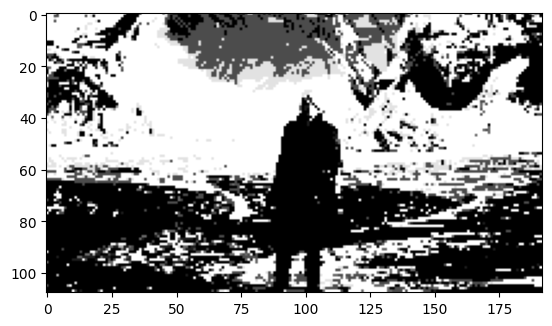

In [162]:
med_val = np.median(gray) 
(thresh, baw) = cv2.threshold(gray, med_val, 255, cv2.THRESH_BINARY)
baw = cv2.cvtColor(baw, cv2.COLOR_RGB2GRAY)
plt.imshow(baw,cmap= 'gray')

In [163]:
# filt = cv2.GaussianBlur(gray,(5,5),0)
med_val = np.median(baw) 
lower = int(max(0 ,0.7*thresh))
upper = int(min(255,1.3*thresh))

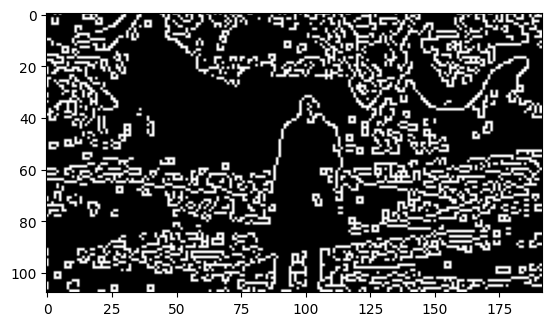

In [164]:
blur = cv2.bilateralFilter(baw,5,10,20)
edge = cv2.Canny(blur,lower,upper)
plt.imshow(edge,cmap= 'gray')

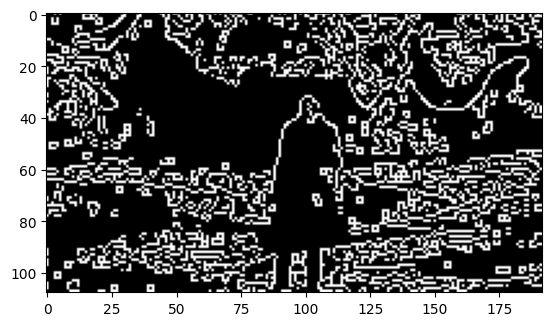

In [165]:
output = Image.fromarray(edge)
output = cv2.cvtColor(edge,cv2.COLOR_GRAY2RGB)
edges = np.asarray(output)
plt.imshow(output)

In [166]:
output = np.empty(imgShape)
for i in range(img.shape[-1]):
    output[...,i] = img[...,i]


ValueError: could not broadcast input array from shape (108,192) into shape (1080,1920)

In [ ]:
# df = pd.DataFrame(edge)
# output = Image.new("RGB",(c*(len(df.columns)),(len(df))),color = (0,0,0))
# d = ImageDraw.Draw(output)

In [ ]:
# o = ''
# for i in range(len(df)):
#     for j in range(len(df.columns)):
#         index = edge[i][j]>0
#         o+=(chl[int(index)]+' ')
#     o+='\n'
# d.multiline_text((0,0),o,font = fnt,fill=(255,255,255),spacing = 0,)
# newFrame = np.asanyarray(output)
# newFrame = cv2.resize(newFrame,(1920,1080))
# output.save('test.png')
# cv2.imwrite('test2.png',newFrame)

True

In [ ]:
# cap = cv2.VideoCapture('./data/vergill4.mp4')
# ret,frame =cap.read()

# from PIL import Image
# im = Image.fromarray(frame)
# im.save("./data/test.jpg")